# Demand data for France

This is interesting because France has a winter peaking electricity system

In [1]:
import pandas as pd
import numpy as np

import time
from datetime import datetime, timedelta
import pytz

In [2]:
df = pd.read_csv('consommation-quotidienne-brute-elec_FR2.csv')
df['date_time'] = pd.to_datetime(df['Date - Heure'])

In [3]:
def make_date_time_col(df):
    
    print(f"Start time {df.iloc[0]['date_time']}")
    
    date_times = []
    vals = []
    for idx in df.index:
        if df.loc[idx, 'date_time'].minute == 30:
            continue
       
        date_times.append(df.loc[idx, 'date_time'].astimezone(pytz.utc)) # Report at end of hour like all others
        # avg of each 30 min slice
        vals.append( (df.loc[idx, 'Consommation (MW)'] + df.loc[idx+1, 'Consommation (MW)']) / 2. ) 
    print(f"Last appended {date_times[-1]}: {vals[-1]}")
    tmp_df = pd.DataFrame({
        'date_time':date_times,
        #'date_strs':date_strs,
        'demand (MW)':vals
    })#, index=date_times)
    return tmp_df




#print(df.head())
tmp_df = make_date_time_col(df)


tmp_df.to_csv('FR_2007-2018.csv', index=False)
    

Start time 2007-12-31 18:00:00-05:00
Last appended 2018-12-31 22:00:00+00:00: 63890.0


In [4]:
import matplotlib.pyplot as plt

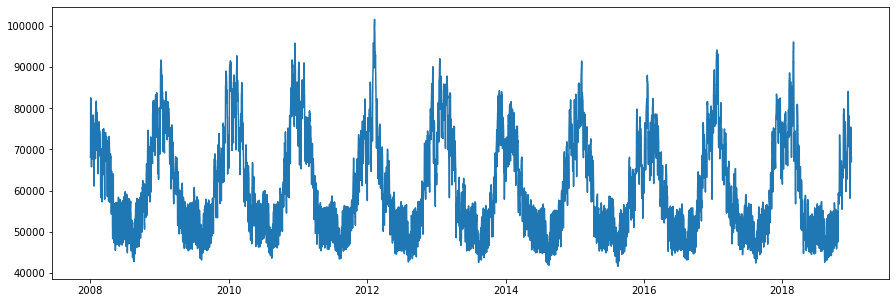

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(tmp_df['date_time'], tmp_df['demand (MW)'].rolling(24).max())

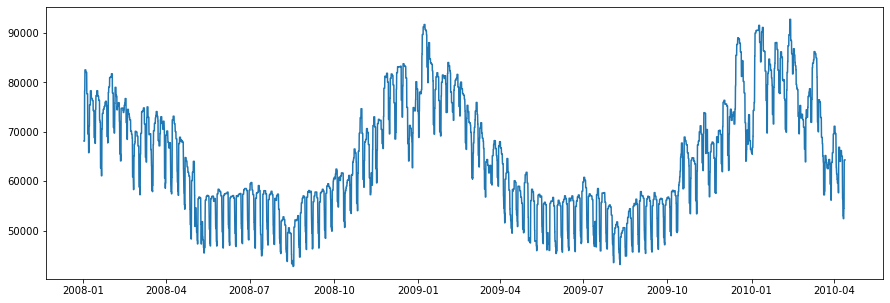

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(tmp_df.loc[0:20000, 'date_time'], tmp_df.loc[0:20000, 'demand (MW)'].rolling(24).max())